<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Customer Churn Analysis

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

### Data Preprocessing 

`Initial inspection`

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA

In [3]:
#importing training and testing dataset
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train, test])

In [4]:
#initial inspection 
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
print('================== Complete Data ==================')
print(df.info())

================== Complete Data ==================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB
None


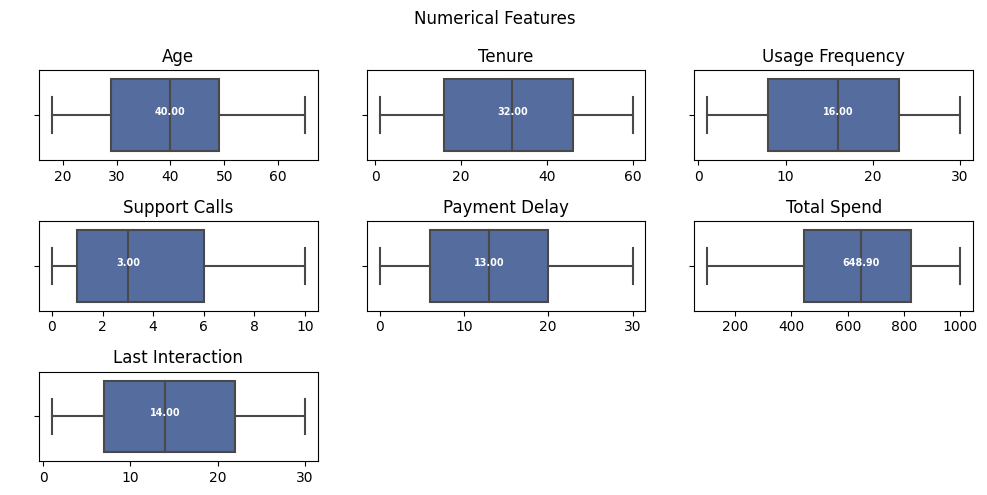

In [7]:
# Checking numerical variables
col_features = df.select_dtypes(['float64', 'int64'])
col_features = col_features[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Numerical Features')

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(col_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for boxplots
    ax = sns.boxplot(data=col_features, x=j, color=custom_color)
    
    # Calculate median for all customers
    median = df[j].median()
    
    # Plot median in the graph with formatting
    ax.text(median, ax.get_yticks(), s='{:.2f}'.format(median), horizontalalignment='center',
            size='x-small', color='w', weight='semibold')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

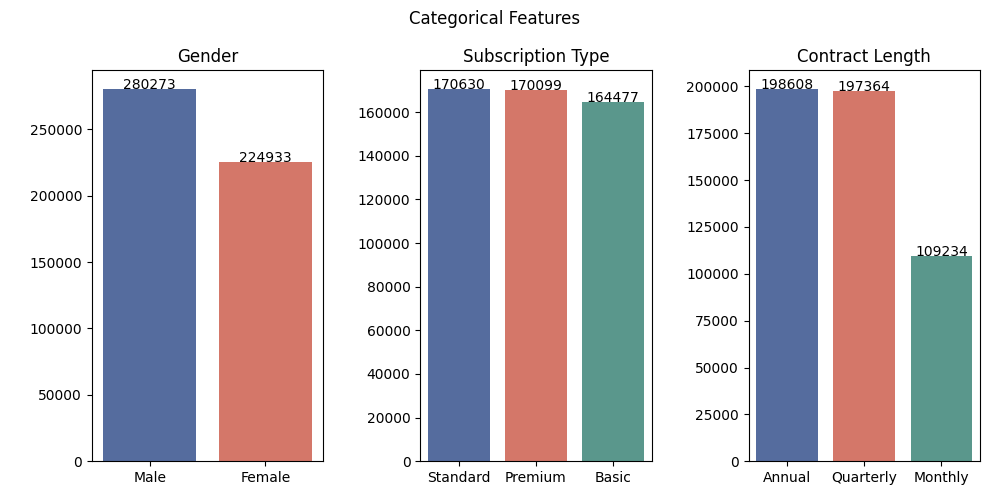

In [8]:
# Checking the categorical variables
col_categorical = df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Categorical Features')

for i, j in enumerate(col_categorical):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_df = df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

In [9]:
#checking for missing values
print('==== Complete Data ====')
print(df.isna().sum())

==== Complete Data ====
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [10]:
#only one missing value, therefore, it is deemed as sufficient to remove this for handling missing values 
#drop missing values
df.dropna(inplace=True)

In [11]:
# Dropping 'CustomerID'
# This variable does not yield any importance for our purpose
df.drop(columns='CustomerID', inplace=True)

The Churn Rate for Antique Bank is: 55.52%


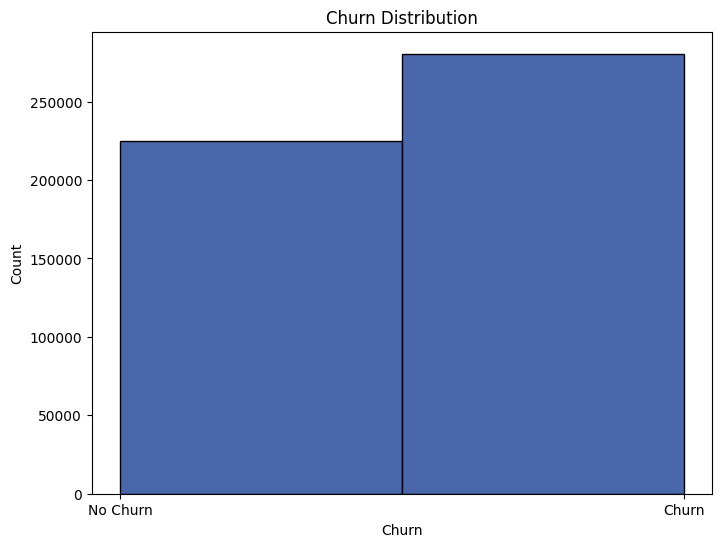

In [12]:
# Churn rate
churn = (sum(df['Churn']) / len(df['Churn'].index)) * 100
print('The Churn Rate for Antique Bank is: {:.2f}%'.format(churn))

# Churn distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Churn'], bins=2, color=['#4967AA'], edgecolor='black', alpha=1.0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn']) # 0 represents No Churn and 1 represents Churn
plt.title('Churn Distribution')
plt.show()

In [13]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


`Data preperation`

In [14]:
# Creating a copy of the original dataset
df1 = df.copy()
df1.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [15]:
# Creating dummy variables for the categorical variables 
df1 = pd.get_dummies(df1, columns=['Subscription Type'], prefix='Subscription Type')
df1 = pd.get_dummies(df1, columns=['Gender'], prefix='Gender')
df1 = pd.get_dummies(df1, columns=['Contract Length'], prefix='Contract Length')

In [16]:
# Scaling the numerical variables
# Numerical features
num = df1[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
           'Payment Delay', 'Total Spend', 'Last Interaction']]

# Scaler 
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num)  # Scale the numerical features

# Replace the original columns with scaled values
df1[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
     'Payment Delay', 'Total Spend', 'Last Interaction']] = scaled_num

df1.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.765883,0.443776,-0.198951,0.372314,0.532844,1.271517,0.277572,1.0,0,0,1,1,0,1,0,0
1,1.996425,1.023907,-1.707192,1.967923,-0.650423,-0.257105,-1.000267,1.0,1,0,0,1,0,0,1,0
2,1.207194,-1.006554,-1.359137,0.691436,0.532844,-1.773498,-1.348769,1.0,1,0,0,1,0,0,0,1
3,1.443963,0.385762,0.613178,1.010558,-0.768750,-0.913393,1.671579,1.0,0,0,1,0,1,0,1,0
4,-1.318345,0.037683,0.497160,0.372314,-0.650423,-0.012526,0.626074,1.0,1,0,0,0,1,0,1,0


### Pattern Recognition

`Correlation Matrix` 

In [17]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = df1.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                         1.000000
Support Calls                 0.516283
Contract Length_Monthly       0.366495
Payment Delay                 0.329785
Age                           0.191224
Gender_Female                 0.168989
Last Interaction              0.127150
Subscription Type_Basic       0.019107
Subscription Type_Standard   -0.007928
Subscription Type_Premium    -0.011012
Tenure                       -0.021308
Usage Frequency              -0.053263
Contract Length_Annual       -0.152712
Contract Length_Quarterly    -0.156347
Gender_Male                  -0.168989
Total Spend                  -0.369682
Name: Churn, dtype: float64

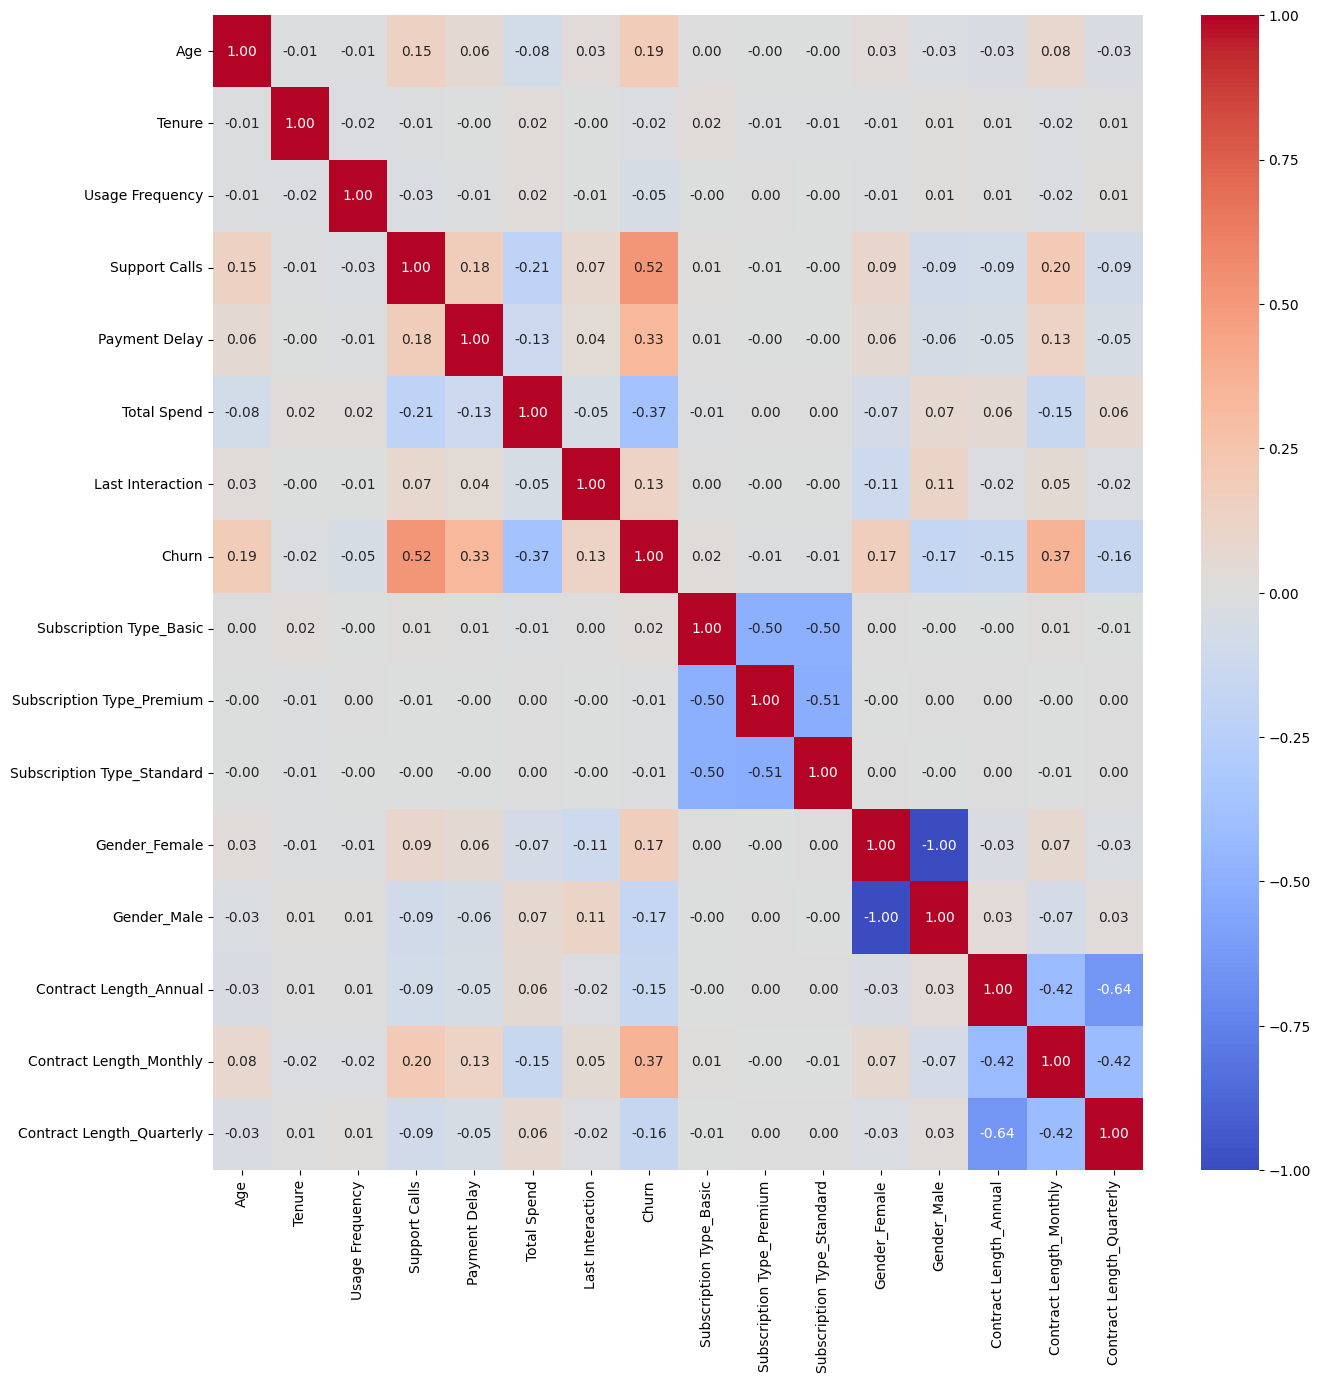

In [18]:
# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

`PCA`

In [19]:
# Dropping 'Churn' variable for PCA
df_pca = df1.drop(columns=['Churn'])
df_pca.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.765883,0.443776,-0.198951,0.372314,0.532844,1.271517,0.277572,0,0,1,1,0,1,0,0
1,1.996425,1.023907,-1.707192,1.967923,-0.650423,-0.257105,-1.000267,1,0,0,1,0,0,1,0
2,1.207194,-1.006554,-1.359137,0.691436,0.532844,-1.773498,-1.348769,1,0,0,1,0,0,0,1
3,1.443963,0.385762,0.613178,1.010558,-0.768750,-0.913393,1.671579,0,0,1,0,1,0,1,0
4,-1.318345,0.037683,0.497160,0.372314,-0.650423,-0.012526,0.626074,1,0,0,0,1,0,1,0


In [20]:
components = None
pca = PCA(n_components = components) #or n_components = desired % of variance explained
# perform PCA on the scaled data
pca.fit(df_pca)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_*100)
print()

Variances (Percentage):
[1.66220167e+01 1.15903460e+01 1.13172003e+01 1.10855100e+01
 1.07573595e+01 9.90796670e+00 8.71739954e+00 5.33103970e+00
 4.44980874e+00 3.82919117e+00 3.73571755e+00 2.65644405e+00
 3.42455024e-29 1.15034089e-29 1.10527704e-29]



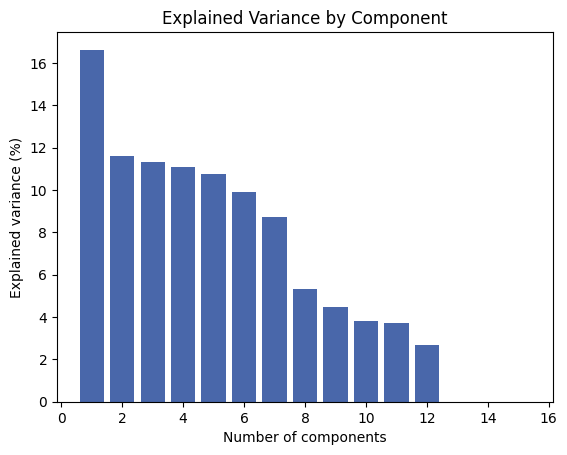

In [21]:
# Number of components you want to display
components = len(pca.explained_variance_ratio_) if components is None else components

# Create a bar chart 
plt.bar(range(1, components + 1), pca.explained_variance_ratio_ * 100, color='#4967AA')

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Explained Variance by Component")

# Show the bar chart
plt.show()

In [22]:
# Get cumulative variance
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 16.62201665  28.21236268  39.52956296  50.615073    61.37243254
  71.28039924  79.99779878  85.32883848  89.77864723  93.6078384
  97.34355595 100.         100.         100.         100.        ]



Ellbow after first and sevenths pc -> select first seven pcs for feature analysis, with first seven pcs 80% of variance is explained 

In [23]:
# Create a DataFrame to store feature contributions to each principal component
feature_contributions = pd.DataFrame(
    data=pca.components_,
    columns=df_pca.columns,  # Assuming X is a DataFrame with column names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Display the top N features contributing to each principal component (e.g., top 5)
num_top_features = 5
for pc in feature_contributions.index:
    top_features = feature_contributions.loc[pc].abs().sort_values(ascending=False).head(num_top_features)
    print(f"Top {num_top_features} Features for {pc}:")
    print(top_features)
    print()

Top 5 Features for PC1:
Support Calls       0.585067
Total Spend         0.501614
Payment Delay       0.450550
Age                 0.359332
Last Interaction    0.209904
Name: PC1, dtype: float64

Top 5 Features for PC2:
Tenure              0.726258
Usage Frequency     0.686107
Last Interaction    0.027704
Total Spend         0.021906
Age                 0.017067
Name: PC2, dtype: float64

Top 5 Features for PC3:
Last Interaction    0.950699
Age                 0.189998
Gender_Male         0.129685
Gender_Female       0.129685
Payment Delay       0.091434
Name: PC3, dtype: float64

Top 5 Features for PC4:
Usage Frequency     0.715973
Tenure              0.671886
Payment Delay       0.156680
Last Interaction    0.084340
Support Calls       0.044974
Name: PC4, dtype: float64

Top 5 Features for PC5:
Age                 0.854244
Payment Delay       0.438726
Total Spend         0.234556
Last Interaction    0.094609
Tenure              0.084536
Name: PC5, dtype: float64

Top 5 Features for P

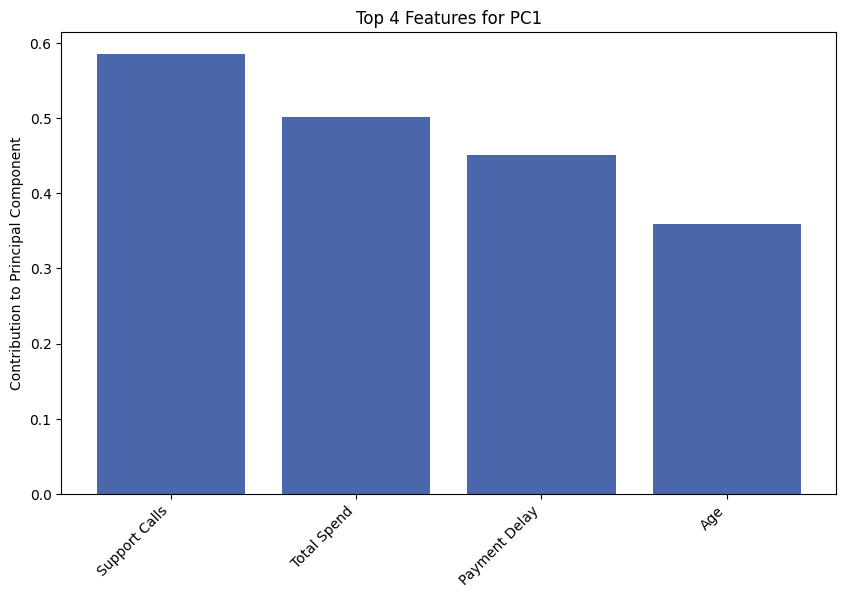

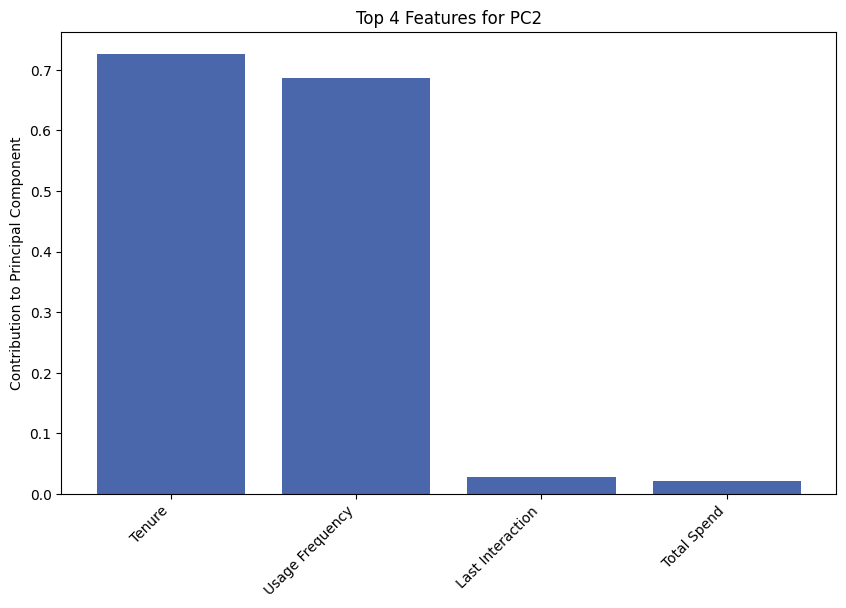

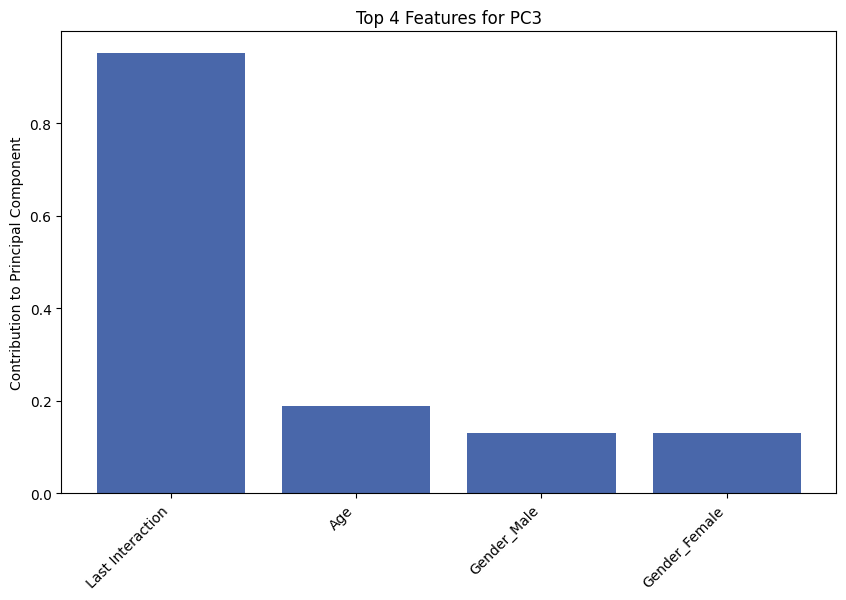

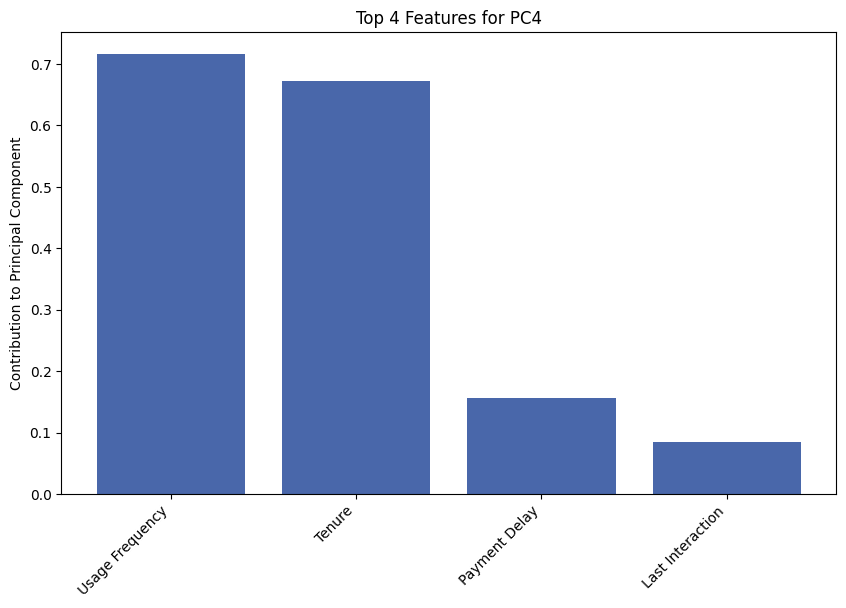

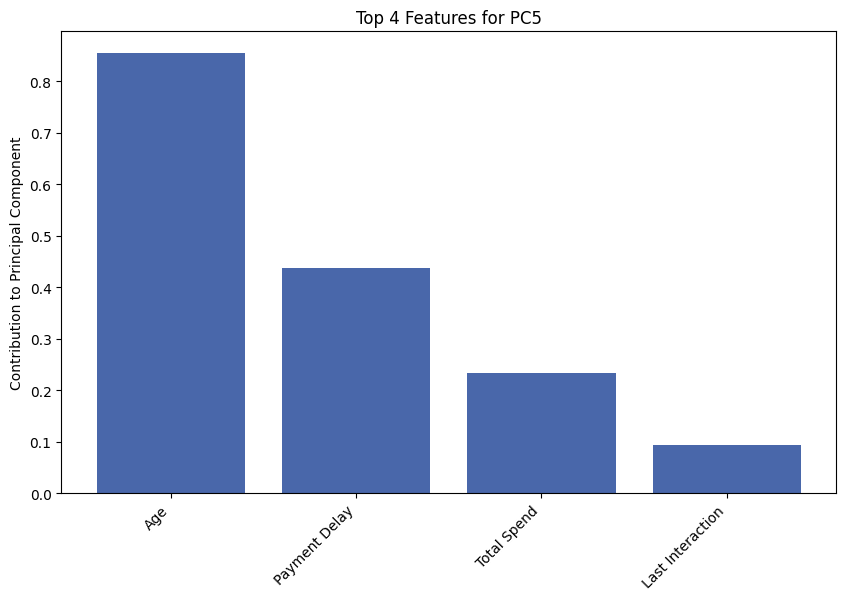

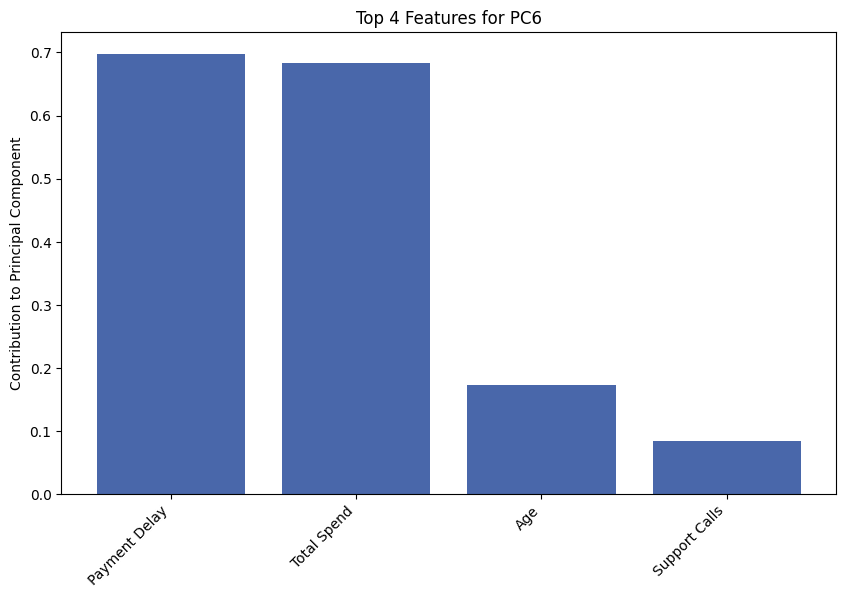

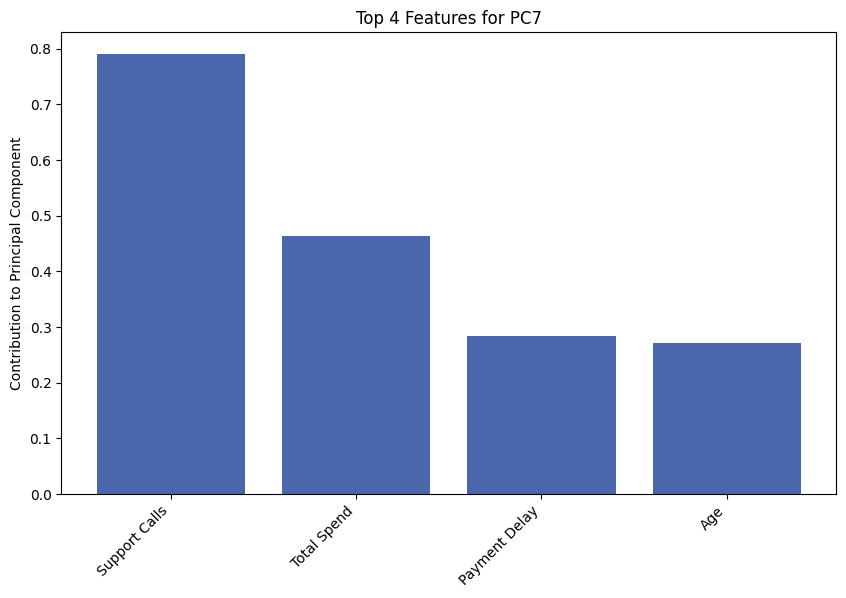

In [24]:
# Number of top features to display
num_top_features = 4

# Loop through the top 7 principal components
for pc in feature_contributions.index[:7]:
    top_features = feature_contributions.loc[pc].abs().sort_values(ascending=False).head(num_top_features)
    
    # Create a bar chart with the specified color
    plt.figure(figsize=(10, 6))
    plt.bar(top_features.index, top_features.values, color='#4967AA')
    plt.ylabel('Contribution to Principal Component')
    plt.title(f'Top {num_top_features} Features for {pc}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Given the analysis of the feature contribution, the most important features in this set are the following: Support Calls, Total Spend, Payment Delay, Age, Tenure, Usage Frequency, and Last Interaction. So there is a correlation between engagement/interaction and likelihood of churn.

### Prediction

`Logistic Regression`

In [25]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Logistic Regression: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [26]:
# Defining independet variables and target variable 
# Using only the features found during PCA for the logistic regression
X = df1[['Support Calls', 'Total Spend', 'Payment Delay', 'Tenure', 'Age', 'Usage Frequency', 'Last Interaction']]
y = df1['Churn']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 45)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(353644, 7) (151562, 7) (353644,) (151562,)


In [27]:
# Initialising Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

LogisticRegression()
 Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79     67430
         1.0       0.84      0.82      0.83     84132

    accuracy                           0.81    151562
   macro avg       0.81      0.81      0.81    151562
weighted avg       0.81      0.81      0.81    151562

 Confusion Matrix:


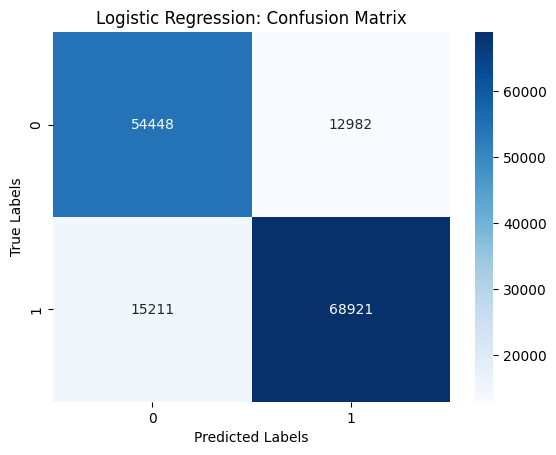

In [28]:
# Evaluating the results 
y_pred = lr.predict(X_test)
evaluate(y_test, y_pred, lr)

#### Feature importance

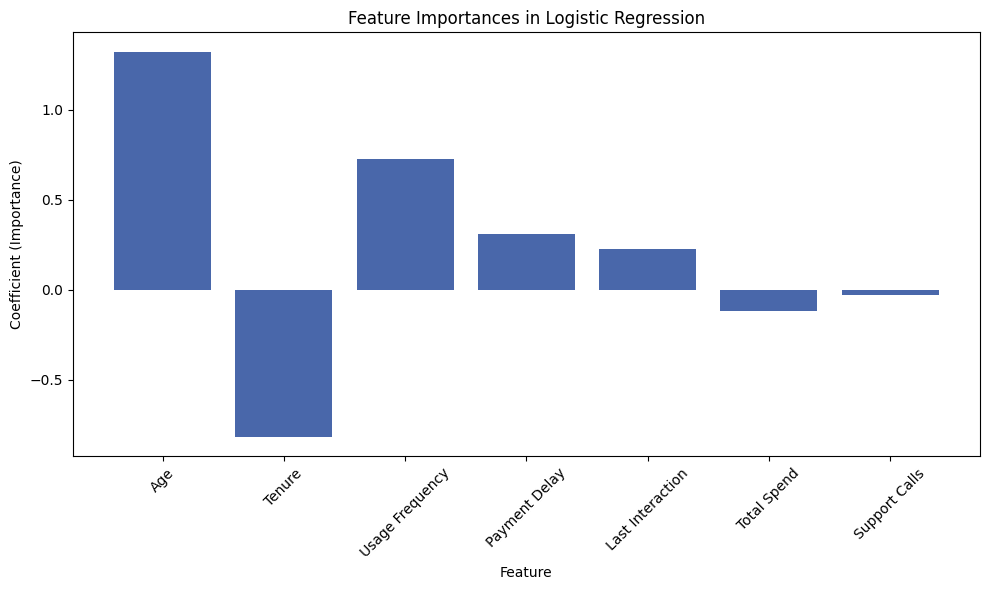

In [30]:
# Feature importance
#getting the coefficients 
coef = lr.coef_[0]

#getting the absolute values of coefficients for ranking 
abs_coef = np.abs(coef)

#sorting the features after importance
sorted_indices = np.argsort(abs_coef)[::-1]
sorted_coef = coef[sorted_indices]

#getting feature names
feature_names = list(df1.columns)

# Create a bar chart with the color #4967AA
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), sorted_coef, tick_label=[feature_names[i] for i in sorted_indices], color='#4967AA')
plt.xlabel('Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Feature Importances in Logistic Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Chrun Risk Ranking

In [32]:
# Predict probabilities for test data
predicted_probabilities = lr.predict_proba(X_test)[:, 1]

# Define churn risk bucket boundaries (adjust as needed)
group_boundaries = np.linspace(0, 1, num=11)  # 10 groups

# Assign customers to churn risk buckets
churn_risk_groups = np.digitize(predicted_probabilities, group_boundaries)
X_test['Churn Risk'] = churn_risk_groups

   Churn Risk Bucket  Number of Customers
0                  1                12344
1                  2                19439
2                  3                15173
3                  4                12434
4                  5                10269
5                  6                 9647
6                  7                 9542
7                  8                11140
8                  9                15920
9                 10                35654


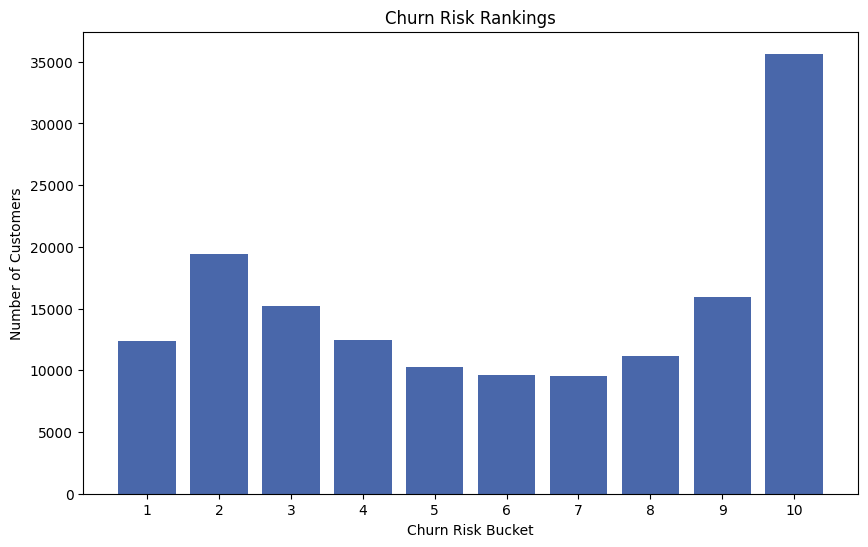

In [33]:
# Create a DataFrame to store churn risk rankings
churn_risk_df = pd.DataFrame({'CustomerID': X_test.index, 'Churn Risk': churn_risk_groups})

# Count the number of customers in each bucket
bucket_counts = churn_risk_df['Churn Risk'].value_counts().sort_index()

# Create a table to display churn risk rankings
churn_risk_table = pd.DataFrame({'Churn Risk Bucket': bucket_counts.index, 'Number of Customers': bucket_counts.values})

# Sort the table by churn risk bucket
churn_risk_table = churn_risk_table.sort_values(by='Churn Risk Bucket')

# Display the churn risk table
print(churn_risk_table)

# Create a bar chart to visualize churn risk rankings
plt.figure(figsize=(10, 6))
custom_color = '#4967AA'  # Define the custom color using the hex code
plt.bar(churn_risk_table['Churn Risk Bucket'], churn_risk_table['Number of Customers'], color=custom_color)
plt.xlabel('Churn Risk Bucket')
plt.ylabel('Number of Customers')
plt.title('Churn Risk Rankings')
plt.xticks(churn_risk_table['Churn Risk Bucket'])
plt.show()

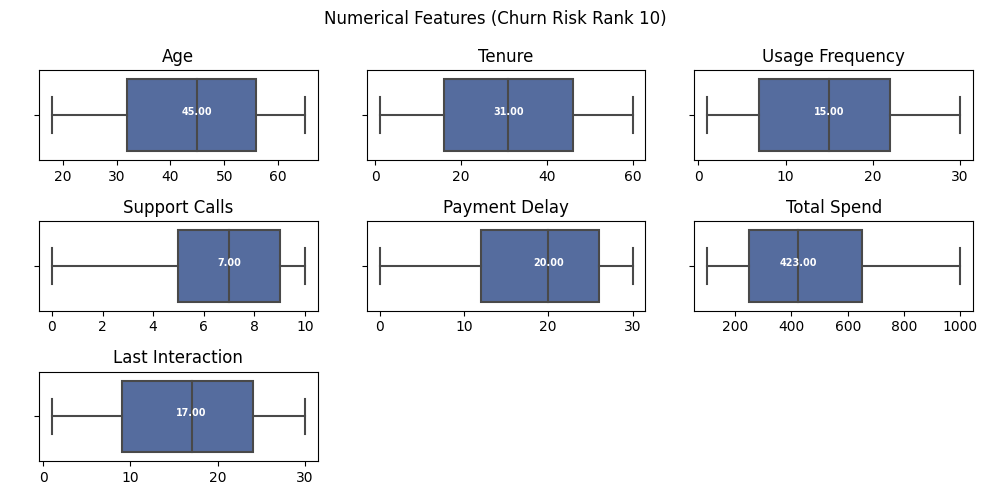

In [34]:
# Find customers in rank 10 (highest churn risk)
rank_10_customers = churn_risk_df[churn_risk_df['Churn Risk'] == 10]

# Get the indices of these customers
rank_10_indices = rank_10_customers['CustomerID']

# Subset of numerical columns for customers in churn risk rank 10
col_features_rank_10 = df.loc[rank_10_indices, ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Numerical Features (Churn Risk Rank 10)')

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(col_features_rank_10):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for boxplots
    ax = sns.boxplot(data=col_features_rank_10, x=j, color=custom_color)
    
    # Calculate median for rank 10 customers
    median = col_features_rank_10[j].median()
    
    # Plot median in the graph with formatting
    ax.text(median, ax.get_yticks(), s='{:.2f}'.format(median), horizontalalignment='center',
            size='x-small', color='w', weight='semibold')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

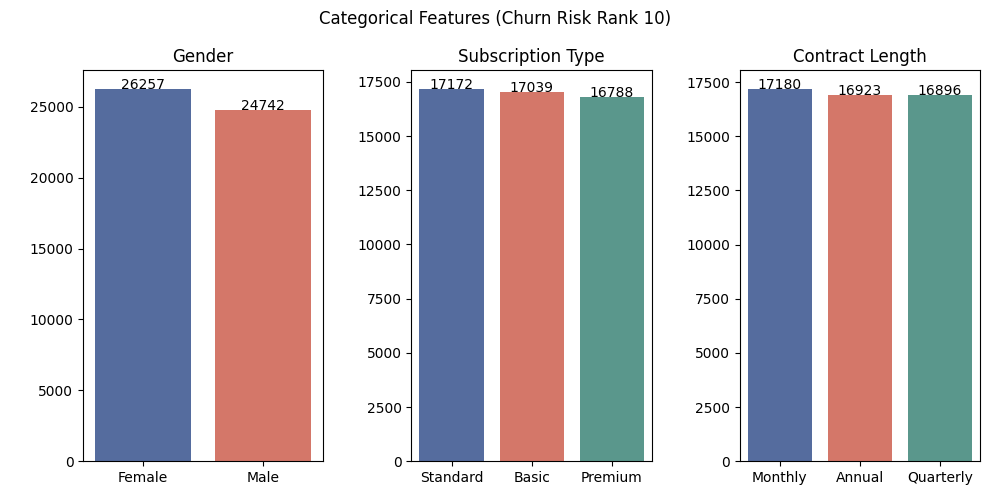

In [35]:
# Filter the dataset for customers in rank 10 (highest churn risk)
df_rank_10 = df.loc[rank_10_indices]

# Select categorical columns for formatting
col_categorical = df_rank_10.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Categorical Features (Churn Risk Rank 10)')

for i, j in enumerate(col_categorical):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_df = df_rank_10[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()